# TITANIC SURVIVAL PREDICTION

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Now lets load the Datasets
X_train=pd.read_csv("train_X.csv")
Y_train=pd.read_csv("train_Y.csv")
X_test=pd.read_csv("test_X.csv")
Y_test=pd.read_csv("test_Y.csv")

In [3]:
# Now showing the data in the table format
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [4]:
#we have an extra column ID lets remove that
X_train=X_train.drop("Id",axis=1)
Y_train=Y_train.drop("Id",axis=1)
X_test=X_test.drop("Id",axis=1)
Y_test=Y_test.drop("Id",axis=1)

In [5]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1


In [6]:
#so in our implementation we need to find the weights, intercept, sigmoid function,
#cost function(which is error representation), and gradient descent (to minimize cost function)
#this whole thing makes to get an logistic regression model
#as we seen the dataset W is(1*m) size , X is (n*m) size,Y is (1*m) size
#so we need to reshape them to get our desired results

X_train=X_train.values
Y_train=Y_train.values
X_test=X_test.values
Y_test=Y_test.values

In [7]:
#reshaping the data sets
X_train=X_train.T
Y_train=Y_train.reshape(1,X_train.shape[1])
X_test=X_test.T
Y_test=Y_test.reshape(1,X_test.shape[1])


In [8]:
print("shape of the X_train:",X_train.shape)
print("shape of the Y_train:",Y_train.shape)
print("shape of the X_test:",X_test.shape)
print("shape of the Y_test:",Y_test.shape)


shape of the X_train: (7, 891)
shape of the Y_train: (1, 891)
shape of the X_test: (7, 418)
shape of the Y_test: (1, 418)


In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
#usually we use sigmoid function which is in between 0 and 1 so from the graph we can say sigmoid function
#takes the value as 0 if the values falls under 0.5 and 1 if the value falls above 0.5
#lets start training our model
#so from the the cost function we could be able to predict the error that model is making
# using that we can implement gradient descent algorithm to reduce the cost function for this we need iterations
def model(X,Y,learning_rate,iterations):
    m=X_train.shape[1]
    n=X_train.shape[0]
#so lets consider m as number of obeservations(by rows) and n as number of features(by columns)
#initializing weight vector and intercep B
    W=np.zeros((n,1))
    B=0
    cost_list=[]
    for i in range(iterations):
        Z=np.dot(W.T,X)+B
        A=sigmoid(Z)
        
        cost=(-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
        dW=(1/m)*np.dot(A-Y,X.T)
        dB=(1/m)*np.sum(A-Y)
        W=W-learning_rate*dW.T
        B=B-learning_rate*dB
        
        cost_list.append(cost)
        if(i%(iterations/10)==0):
            print("cost after",i,"iteration is:",cost)
        
    return W,B,cost_list
        
    


In [11]:
iterations=10000
learning_rate=0.005
W,B,cost_list=model(X_train,Y_train,learning_rate=learning_rate,iterations=iterations)


cost after 0 iteration is: 0.6931471805599454
cost after 1000 iteration is: 0.6086767805723815
cost after 2000 iteration is: 0.5637411284619925
cost after 3000 iteration is: 0.5335847267892615
cost after 4000 iteration is: 0.5126437091140454
cost after 5000 iteration is: 0.497975250341558
cost after 6000 iteration is: 0.487599583687387
cost after 7000 iteration is: 0.48016703349462503
cost after 8000 iteration is: 0.4747629208491926
cost after 9000 iteration is: 0.4707695782931002


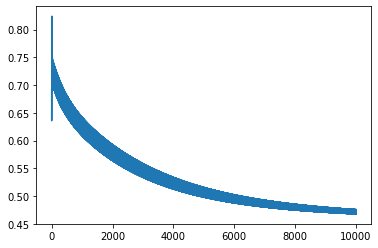

In [12]:
#Lets Plot the Graph of Cost versus iteration
plt.plot(np.arange(iterations),cost_list)

In [24]:
#finding of accuracy
def accuracy(X,Y,W,B):
    Z=np.dot(W.T,X)+B
    A=sigmoid(Z)
    A = A>0.5
    A=np.array(A,dtype='int64') 
    acc = (1-np.sum(np.absolute(A-Y))/Y.shape[1])*100 
    print("accuracy of the model is:",round(acc,2),"%")
    
         

In [25]:
accuracy(X_test,Y_test,W,B)

accuracy of the model is: 90.91 %
